In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the dataset
df = pd.read_csv("train_titanic.csv")
df_test = pd.read_csv("test_titanic.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.shape

(891, 12)

In [10]:
#Counting number of survived and non-survived people
survived_df = df[df['Survived'] == 1]
non_survived_df = df[df['Survived'] == 0]

In [11]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
survived_df.shape

(342, 12)

In [13]:
non_survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
#for passenger class
Pclass1_df = df[df['Pclass'] == 1]
Pclass2_df = df[df['Pclass'] == 2]
Pclass3_df = df[df['Pclass'] == 3]

# number of survived for respective passenger classes
Pclass1_df_sur = Pclass1_df[Pclass1_df['Survived'] == 1]
Pclass2_df_sur = Pclass2_df[Pclass2_df['Survived'] == 1]
Pclass3_df_sur = Pclass3_df[Pclass3_df['Survived'] == 1]

In [15]:
#Print the number of urvived people in respective passenger class
print(len(Pclass1_df_sur))
print(len(Pclass2_df_sur))
print(len(Pclass3_df_sur))

136
87
119


In [16]:
# Finding the total length of passengers per lass
print("Total Num of passenger in class1:",len(Pclass1_df))
print("Total Num of passenger in class2:",len(Pclass2_df))
print("Total Num of passenger in class3:",len(Pclass3_df))

Total Num of passenger in class1: 216
Total Num of passenger in class2: 184
Total Num of passenger in class3: 491


In [17]:
print("Total number of passenger: ", len(df))
print("Number of passenger survived: ", len(survived_df))
print("Number of passenger who did not survived: ", len(non_survived_df))
print("Percentage of passenger survived is: ",len(survived_df)/len(df) * 100, "%")
print("Percentage of passenger did notsurvived is: ",len(non_survived_df)/len(df) * 100, "%")

Total number of passenger:  891
Number of passenger survived:  342
Number of passenger who did not survived:  549
Percentage of passenger survived is:  38.38383838383838 %
Percentage of passenger did notsurvived is:  61.61616161616161 %


<Axes: xlabel='Pclass', ylabel='count'>

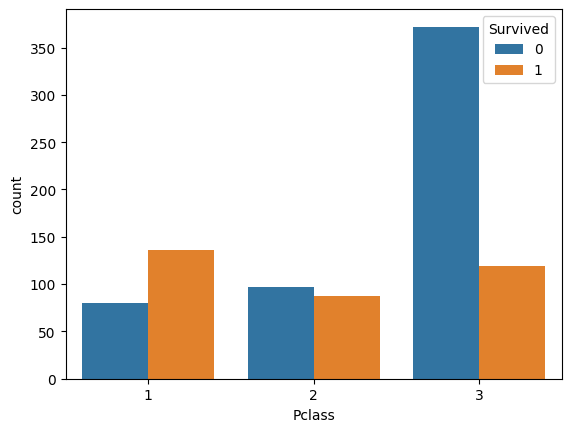

In [18]:
sns.countplot(x= 'Pclass', hue='Survived', data=df)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# lets drop cabin,embark,passengerid,name,ticket
column = ['PassengerId','Name','Ticket','Cabin','Embarked']
df.drop(column,axis = 1, inplace = True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


<Axes: xlabel='Sex', ylabel='Age'>

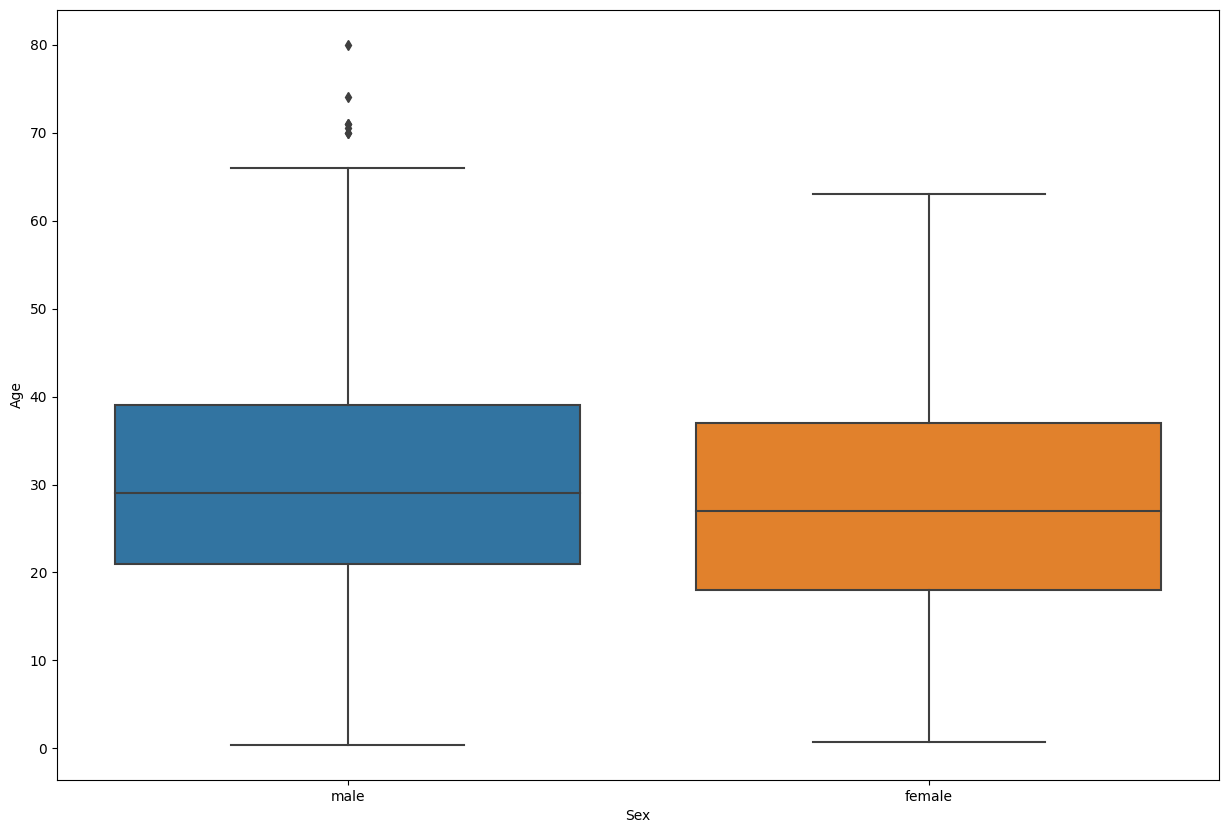

In [22]:
#there is null value in Age column. Let try to remove it

#Let get the avg value of male and female
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y='Age',data=df)

In [23]:
#Outlier present in Age column. Try to remove it

def fill_age(data):
  age = data[0]
  sex = data[1]

  if pd.isnull(age):
    if sex == 'male':
      return 29
    else:
      return 25
  else:
    return age

In [24]:
df['Age']= df[['Age','Sex']].apply(fill_age,axis=1)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [26]:
#now we can see no null value for age column

In [27]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [28]:
male =pd.get_dummies(df['Sex'],drop_first =True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
# adding male column into our dataset
df = pd.concat([df,male],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,25.0,1,2,23.4500,0
889,1,1,male,26.0,0,0,30.0000,1


In [30]:
# dropping the 'Sex' column
df.drop(['Sex'],axis = 1,inplace = True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [31]:
X = df.drop('Survived',axis = 1).values
y =  df['Survived'].values


In [32]:
#test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state = 42)

In [33]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(random_state=0)
Logistic_Regression.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [34]:
y_predict_test1 = Logistic_Regression.predict(X_test)
y_predict_test1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict_test1)
cm

array([[92, 13],
       [20, 54]])

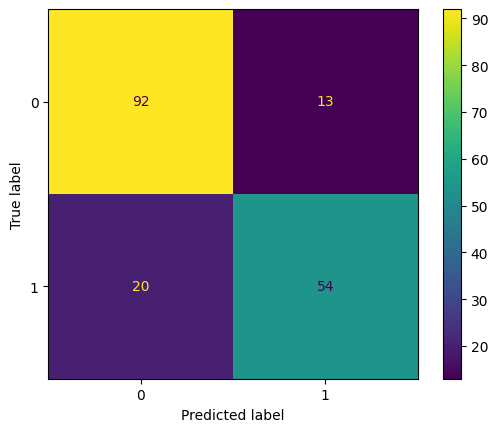

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [37]:
print(classification_report(y_test,y_predict_test1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [38]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
y_pred = NaiveBayes.predict(X_test)

In [39]:
y_predict_test2 = NaiveBayes.predict(X_test)
y_predict_test2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [40]:
cm = confusion_matrix(y_test, y_predict_test2)
cm

array([[85, 20],
       [21, 53]])

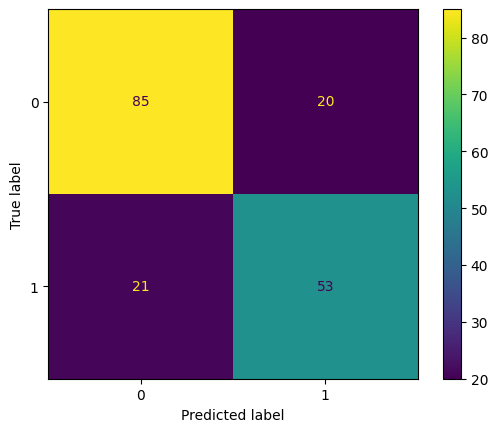

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [42]:
print(classification_report(y_test, y_predict_test2))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



**COMPARATIVE STUDY**

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
x = ["Logistics Regression", "Naive Bayes"]
y1 = [accuracy_score(y_test, y_predict_test1), accuracy_score(y_test, y_predict_test2)]
y2 = [precision_score(y_test, y_predict_test1), precision_score(y_test, y_predict_test2)]
y3 = [recall_score(y_test, y_predict_test1), recall_score(y_test, y_predict_test2)]
y4 = [f1_score(y_test, y_predict_test1), f1_score(y_test, y_predict_test2)]
y5 = [1 - accuracy_score(y_test, y_predict_test1), 1 - accuracy_score(y_test, y_predict_test2)]

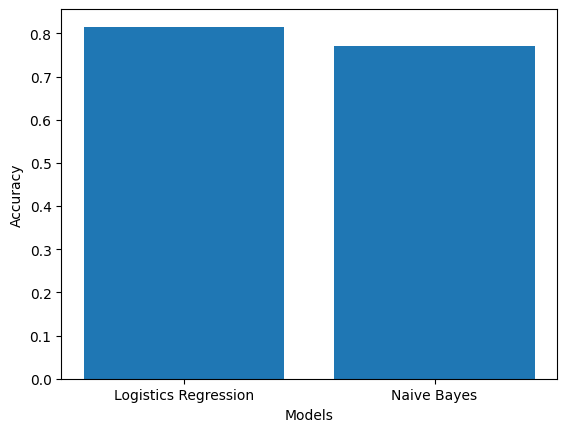

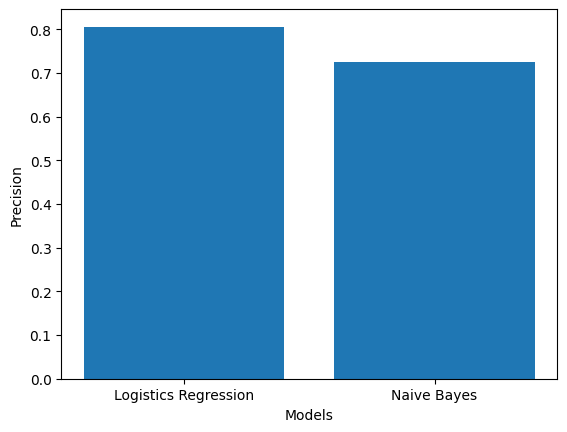

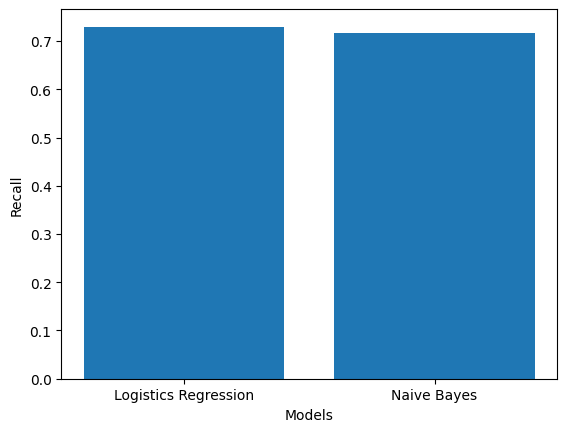

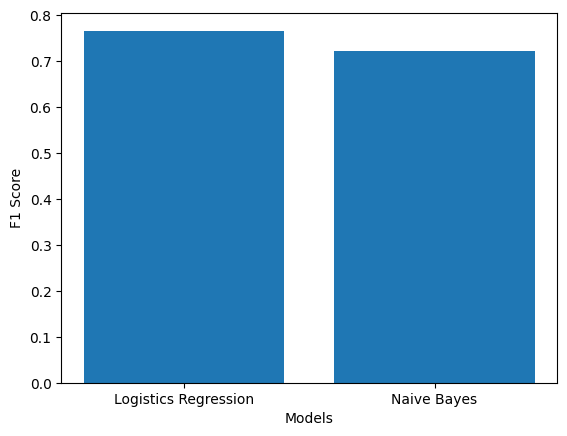

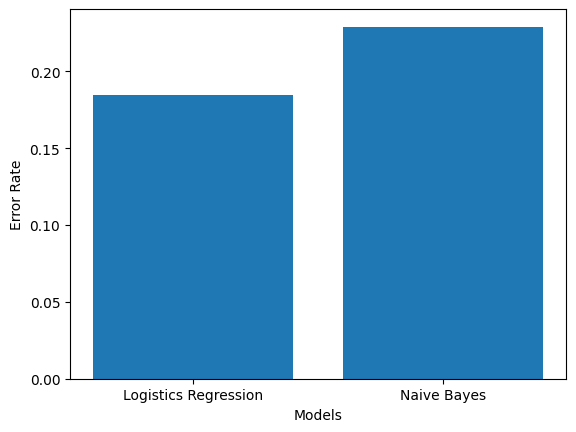

In [45]:
plt.bar(x, y1)
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.show()

plt.bar(x, y2)
plt.xlabel('Models')
plt.ylabel("Precision")
plt.show()

plt.bar(x, y3)
plt.xlabel('Models')
plt.ylabel("Recall")
plt.show()

plt.bar(x, y4)
plt.xlabel('Models')
plt.ylabel("F1 Score")
plt.show()

plt.bar(x, y5)
plt.xlabel('Models')
plt.ylabel("Error Rate")
plt.show()

**Accuracy** of both models as:

1.**Logistic Regression**: 80%

2.**Naive Bayes**: 76%